In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

df= pd.read_csv(r'StudentPerformanceFactors.csv')

In [3]:
df.columns


Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [4]:
df_simple=df[['Hours_Studied', 'Exam_Score']]
df_simple.isnull().sum()

Hours_Studied    0
Exam_Score       0
dtype: int64

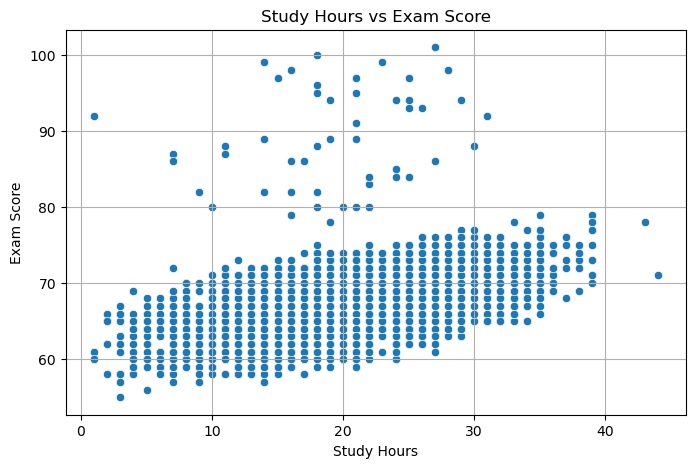

In [5]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_simple, x='Hours_Studied', y='Exam_Score')
plt.title('Study Hours vs Exam Score')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df_simple[['Hours_Studied']]
y = df_simple['Exam_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [7]:
print("Slope (coef_):", model.coef_[0])
print("Intercept:", model.intercept_)


Slope (coef_): 0.2856687444430866
Intercept: 61.511167469044246


In [8]:
y_pred = model.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(comparison.head())


   Actual  Predicted
0      65  67.224542
1      65  67.795880
2      71  67.510211
3      64  64.939192
4      66  67.510211


In [9]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 10.855921288793322
R² Score: 0.2319868674542105


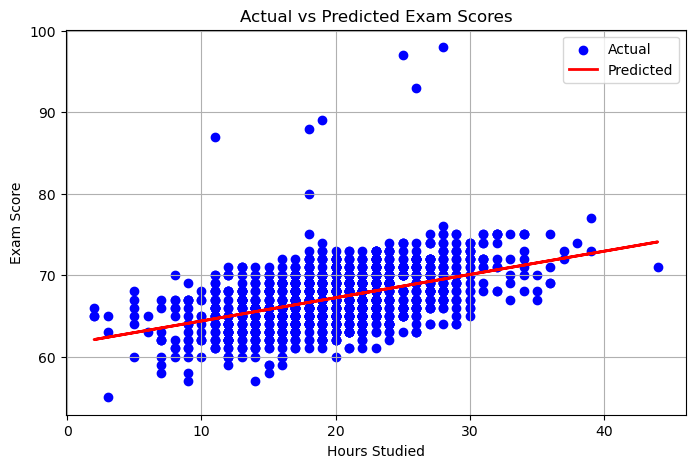

In [10]:
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title("Actual vs Predicted Exam Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.legend()
plt.grid(True)
plt.show()


In [11]:
import joblib
joblib.dump(model, 'student_score_model.pkl')

['student_score_model.pkl']